## Modeling
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
    **For every 1 unit increase in $x_i$, we expect SalePrice to increase by $\beta_i$.**
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [2]:
# Access scaled & Test/Train-Split variables from Notebook: 02_Preprocessing_and_Feature_Engineering

%store -r Z_train
%store -r Z_test
%store -r y_train
%store -r y_test
%store -r features

%store -r Z_train2
%store -r Z_test2
%store -r y_train2
%store -r y_test2
%store -r features2

%store -r Z_train3
%store -r Z_test3
%store -r y_train3
%store -r y_test3
%store -r features3

# Model 4 Variables
%store -r Z_train4
%store -r Z_test4
%store -r y_train4
%store -r y_test4

### Model Preparation

##### Instantiate the models

In [3]:
# Instantiate linear regression model
lm = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()
lm4 = LinearRegression()

In [4]:
# Instantiate LassoCV, fit with default parameters
lasso  = LassoCV(n_alphas=200)
lasso2 = LassoCV(n_alphas=200)
lasso3 = LassoCV(n_alphas=200)
lasso4 = LassoCV(n_alphas=200)

In [5]:
# Instantiate RidgeCV, fit with default parameters
ridge  = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge2 = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge3 = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge4 = RidgeCV(alphas=np.linspace(.1, 10, 100))

##### Establish Baseline Score: Cross Validation

In [6]:
# Cross-Val: Baseline Score
lm_scores  = cross_val_score(lm,  Z_train,  y_train,  cv=5)
lm2_scores = cross_val_score(lm2, Z_train2, y_train2, cv=5)
lm3_scores = cross_val_score(lm3, Z_train3, y_train3, cv=5)
lm4_scores = cross_val_score(lm4, Z_train4, y_train4, cv=5)

In [7]:
print(lm_scores.mean(),lm2_scores.mean(), lm3_scores.mean(), lm4_scores.mean())

0.7636902331607145 0.7636902331607145 0.8088342466666723 0.8333781612633103


In [8]:
# Use cross_val_score to evaluate LassoCV
lasso_scores  = cross_val_score(lasso,  Z_train,  y_train,  cv=5)
lasso2_scores = cross_val_score(lasso2, Z_train2, y_train2, cv=5)
lasso3_scores = cross_val_score(lasso3, Z_train3, y_train3, cv=5)
lasso4_scores = cross_val_score(lasso4, Z_train4, y_train4, cv=5)

In [9]:
print(lasso_scores.mean(),lasso2_scores.mean(),lasso3_scores.mean(),lasso4_scores.mean())

0.763713007436246 0.763713007436246 0.8093587566572884 0.8317071317472365


In [10]:
# Use cross_val_score to evaluate RidgeCV
ridge_scores  = cross_val_score(ridge,  Z_train,  y_train,  cv=5)
ridge2_scores = cross_val_score(ridge2, Z_train2, y_train2, cv=5)
ridge3_scores = cross_val_score(ridge3, Z_train3, y_train3, cv=5)
ridge4_scores = cross_val_score(ridge4, Z_train4, y_train4, cv=5)

In [11]:
print(ridge_scores.mean(), ridge2_scores.mean(), ridge3_scores.mean(), ridge4_scores.mean())

0.7638996576159746 0.7638996576159746 0.8104509489620652 0.8340666052920035


##### Fit the best performing model

In [12]:
Z_test3.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,NeighborhoodC_1,NeighborhoodC_2,Paved DriveC_1,...,Condition 1C_2,Bldg TypeC_1,Exterior 1stC_1,Exter QualC_1,Exter QualC_2,FoundationC_1,FoundationC_2,Heating QCC_1,Heating QCC_2,Central AirC_1
1972,-1.626595,-1.085692,-0.221273,-0.149280,-1.244910,-0.844355,-0.781201,1,0,0,...,0,1,0,0,0,1,0,0,1,0
694,0.846619,-0.024709,1.662861,1.301578,1.228548,0.648631,0.621675,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906,-0.580235,0.008447,-1.719499,-1.279703,-0.860458,-1.024232,-0.079763,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
# Fit the linear regression to chosen scaled-features
lm.fit(Z_train, y_train)
lm2.fit(Z_train2, y_train2)
lm3.fit(Z_train3, y_train3)
lm4.fit(Z_train4, y_train4)

# 1. Train Score
lm_train_score = lm.score(Z_train,y_train)
lm2_train_score = lm2.score(Z_train2,y_train2)
lm3_train_score = lm3.score(Z_train3, y_train3)
lm4_train_score = lm4.score(Z_train4, y_train4)

# 2. Test Score
lm_test_score  = lm.score( Z_test,  y_test)
lm2_test_score = lm2.score(Z_test2, y_test2)
lm3_test_score = lm3.score(Z_test3, y_test3)
lm4_test_score = lm4.score(Z_test4, y_test4)

print(f'LinearReg 1:    Train={lm_train_score:.6f},\n\t\tTest= {lm_test_score:.6f}, \nCross-Val Score:Train={lm_scores.mean():.6f}\n')
print(f'LinearReg 2:    Train={lm2_train_score:.6f},\n\t\tTest= {lm2_test_score:.6f},\nCross-Val Score:Train={lm2_scores.mean():.6f}\n')
print(f'LinearReg 3:    Train={lm3_train_score:.6f},\n\t\tTest= {lm3_test_score:.6f}, \nCross-Val Score:Train={lm3_scores.mean():.6f}\n')
print(f'LinearReg 4:    Train={lm4_train_score:.6f},\n\t\tTest= {lm4_test_score:.6f}, \nCross-Val Score:Train={lm4_scores.mean():.6f}')

LinearReg 1:    Train=0.777785,
		Test= 0.822252, 
Cross-Val Score:Train=0.763690

LinearReg 2:    Train=0.777785,
		Test= 0.822252,
Cross-Val Score:Train=0.763690

LinearReg 3:    Train=0.832435,
		Test= 0.864527, 
Cross-Val Score:Train=0.808834

LinearReg 4:    Train=0.851930,
		Test= 0.844978, 
Cross-Val Score:Train=0.833378


In [14]:
##### Fit the lasso regression to chosen scaled-features
lasso.fit(Z_train, y_train)
lasso2.fit(Z_train2, y_train2)
lasso3.fit(Z_train3, y_train3)
lasso4.fit(Z_train4, y_train4)

# 1. Train Score
lasso_train_score = lasso.score(Z_train,y_train)
lasso2_train_score = lasso2.score(Z_train2,y_train2)
lasso3_train_score = lasso3.score(Z_train3,y_train3)
lasso4_train_score = lasso4.score(Z_train4,y_train4)

# 2. Test Score
lasso_test_score = lasso.score(Z_test, y_test)
lasso2_test_score = lasso2.score(Z_test2, y_test2)
lasso3_test_score = lasso3.score(Z_test3, y_test3)
lasso4_test_score = lasso4.score(Z_test4, y_test4)

print(f'LassoCV 1:   Train={lasso_train_score}, Test={lasso_test_score}, \nCross-Val Score: Train={lasso_scores.mean()}')
print(f'LassoCV 2:   Train={lasso2_train_score}, Test={lasso2_test_score}, \nCross-Val Score: Train={lasso2_scores.mean()}')
print(f'LassoCV 3:   Train={lasso3_train_score}, Test={lasso3_test_score}, \nCross-Val Score: Train={lasso3_scores.mean()}')
print(f'LassoCV 4:   Train={lasso4_train_score}, Test={lasso4_test_score}, \nCross-Val Score: Train={lasso4_scores.mean()}')

LassoCV 1:   Train=0.7777706362917753, Test=0.8218268755949247, 
Cross-Val Score: Train=0.763713007436246
LassoCV 2:   Train=0.7777706362917753, Test=0.8218268755949247, 
Cross-Val Score: Train=0.763713007436246
LassoCV 3:   Train=0.8312618655800708, Test=0.8648239111877506, 
Cross-Val Score: Train=0.8093587566572884
LassoCV 4:   Train=0.851586017640712, Test=0.8455174972106065, 
Cross-Val Score: Train=0.8317071317472365


In [15]:
# Fit the Ridge regression to chosen scaled-features
ridge.fit(Z_train, y_train)
ridge2.fit(Z_train2, y_train2)
ridge3.fit(Z_train3, y_train3)
ridge4.fit(Z_train4, y_train4)

# 1. Train Score
ridge_train_score = ridge.score(Z_train,y_train)
ridge2_train_score = ridge2.score(Z_train2,y_train2)
ridge3_train_score = ridge3.score(Z_train3,y_train3)
ridge4_train_score = ridge4.score(Z_train4,y_train4)

# 2. Test Score
ridge_test_score = ridge.score(Z_test, y_test)
ridge2_test_score = ridge2.score(Z_test2, y_test2)
ridge3_test_score = ridge3.score(Z_test3, y_test3)
ridge4_test_score = ridge4.score(Z_test4, y_test4)

print(f'RidgeCV r2 Score 1:   Train={ridge_train_score}, Test={ridge_test_score}, \nCross-Val Score: Train={ridge_scores.mean()}')
print(f'RidgeCV r2 Score 2:   Train={ridge2_train_score}, Test={ridge2_test_score}, \nCross-Val Score: Train={ridge2_scores.mean()}')
print(f'RidgeCV r2 Score 3:   Train={ridge3_train_score}, Test={ridge3_test_score}, \nCross-Val Score: Train={ridge3_scores.mean()}')
print(f'RidgeCV r2 Score 4:   Train={ridge4_train_score}, Test={ridge4_test_score}, \nCross-Val Score: Train={ridge4_scores.mean()}')

RidgeCV r2 Score 1:   Train=0.7777768375202648, Test=0.8222868944529705, 
Cross-Val Score: Train=0.7638996576159746
RidgeCV r2 Score 2:   Train=0.7777768375202648, Test=0.8222868944529705, 
Cross-Val Score: Train=0.7638996576159746
RidgeCV r2 Score 3:   Train=0.8314101635050883, Test=0.8643944203288217, 
Cross-Val Score: Train=0.8104509489620652
RidgeCV r2 Score 4:   Train=0.8506048066073496, Test=0.8456712120582073, 
Cross-Val Score: Train=0.8340666052920035


3. Cross-Val (the avg of five Test-scores) - This will serve as a baseline $R^2$ for the model

**Look at your coefficients.** Are any of them wildly overblown? 

For every 1 unit increase in  𝑥𝑖 , we expect SalePrice to increase by  𝛽𝑖 .

In [22]:
features3

['Year Remod/Add',
 'Year Built',
 '1st Flr SF',
 'Total Bsmt SF',
 'Garage Area',
 'Gr Liv Area',
 'Overall Qual',
 'NeighborhoodC_1',
 'NeighborhoodC_2',
 'Paved DriveC_1',
 'Lot ShapeC_1',
 'Land ContourC_1',
 'Lot ConfigC_1',
 'Condition 1C_1',
 'Condition 1C_2',
 'Bldg TypeC_1',
 'Exterior 1stC_1',
 'Exter QualC_1',
 'Exter QualC_2',
 'FoundationC_1',
 'FoundationC_2',
 'Heating QCC_1',
 'Heating QCC_2',
 'Central AirC_1']

In [23]:
# The `lm` object contains our model's coefficients
coeff1 = pd.Series(lm.coef_, index=features)[::-1]   # Model 1 Coefficients
coeff2 = pd.Series(lm2.coef_, index=features2)[::-1] # Model 2 Coefficients
coeff3 = pd.Series(lm3.coef_, index=features3)[::-1] # Model 3 Coefficients
coeff4 = pd.Series(lm4.coef_, index=features3)[::-1] # Model 4 Coefficients

for i in range(len(coeff4)):
    print(f'{coeff4[i]:,.2f}:\t{coeff4.index[i]}')

ValueError: Length of passed values is 7, index implies 9.

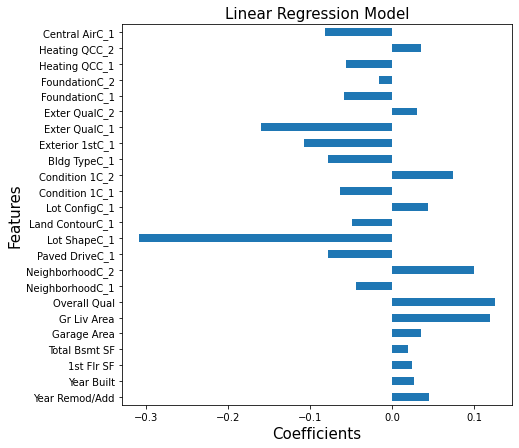

In [26]:
#pd.Series(lm.coef_, index=features).plot.barh(figsize=(7, 7));
#pd.Series(lm2.coef_, index=features2).plot.barh(figsize=(7, 7));
#pd.Series(lm.3coef_, index=features3).plot.barh(figsize=(7, 7));
pd.Series(lm4.coef_, index=features3).plot.barh(figsize=(7, 7));

plt.ylabel(f'Features', fontsize =15);
plt.xlabel('Coefficients', fontsize=15);
plt.title(f'Linear Regression Model', fontsize=15);

In [27]:
feature_dict = {}
for i in range(len(features)):
    feature_dict[features[i]] = lm.coef_[i]
feature_dict['intercept'] = lm.intercept_
print(feature_dict)
%store feature_dict

{'Year Remod/Add': 6215.9595799869185, 'Year Built': 8878.830962828917, '1st Flr SF': 6483.61069046594, 'Total Bsmt SF': 5665.938202131225, 'Garage Area': 10208.124468840166, 'Gr Liv Area': 22701.243600917776, 'Overall Qual': 28846.67538146822, 'intercept': 181579.91185316737}
Stored 'feature_dict' (dict)


In [28]:
feature_df = pd.DataFrame(feature_dict.values(), feature_dict.keys())

In [29]:
# And the y-intercept.
print(f'Model 1 Intercept: {lm.intercept_:,.2f}')
print(f'Model 2 Intercept: {lm2.intercept_:,.2f}')
print(f'Model 3 Intercept: {lm3.intercept_:,.2f}')
print(f'Model 4 Intercept: {lm4.intercept_:,.2f}')

Model 1 Intercept: 181,579.91
Model 2 Intercept: 181,579.91
Model 3 Intercept: 176,650.50
Model 4 Intercept: 12.05


## Modeling
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This is the model that best answers your problem statement.)
- Refine and interpret your production model.

In [30]:
Z_test3.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,NeighborhoodC_1,NeighborhoodC_2,Paved DriveC_1,...,Condition 1C_2,Bldg TypeC_1,Exterior 1stC_1,Exter QualC_1,Exter QualC_2,FoundationC_1,FoundationC_2,Heating QCC_1,Heating QCC_2,Central AirC_1
1972,-1.626595,-1.085692,-0.221273,-0.149280,-1.244910,-0.844355,-0.781201,1,0,0,...,0,1,0,0,0,1,0,0,1,0
694,0.846619,-0.024709,1.662861,1.301578,1.228548,0.648631,0.621675,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906,-0.580235,0.008447,-1.719499,-1.279703,-0.860458,-1.024232,-0.079763,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
# Create predictions using the `lm` object.
y_pred = lm.predict(Z_test)
y_pred2 = lm2.predict(Z_test2)
y_pred3 = lm3.predict(Z_test3)
y_pred4 = lm4.predict(Z_test4)
y_score4 = lm4.predict() # I need to go back and take test_df['SalePrice'] = np.exp(lm4.predict(test_df[features3]))
#Then test_df[['ID', 'SalePrice']]

#Create a list of y_pred in X_test df b/c I want to use sns.regplot
Z_test['y_pred']  = y_pred
Z_test2['y_pred'] = y_pred2
Z_test3['y_pred'] = y_pred3
Z_test4['y_pred'] = y_pred4

In [32]:
y_score4 = np.exp(y_pred4)
%store y_score4

Stored 'y_score4' (ndarray)


In [33]:
# Check that all is copacetic
Z_test2.head(3)

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,y_pred
1972,-1.626595,-1.085692,-0.221273,-0.149280,-1.244910,-0.844355,-0.781201,105137.771921
694,0.846619,-0.024709,1.662861,1.301578,1.228548,0.648631,0.621675,249978.219067
906,-0.580235,0.008447,-1.719499,-1.279703,-0.860458,-1.024232,-0.079763,125312.984236


In [34]:
#%store X_test
%store Z_test
%store Z_test2
%store Z_test3
%store Z_test4

Stored 'Z_test' (DataFrame)
Stored 'Z_test2' (DataFrame)
Stored 'Z_test3' (DataFrame)
Stored 'Z_test4' (DataFrame)
